# `generated_reviews_enth` Data Exploration

In [1]:
import re
import pandas as pd
from pathlib import Path
from pythainlp.tokenize import word_tokenize
from tqdm.auto import tqdm

# For visualization
import seaborn as sns
from matplotlib import pyplot as plt

# params
pd.set_option("max_colwidth", 0)
sns.set_context("talk")
sns.set_palette(sns.color_palette("colorblind", 10))

%matplotlib inline

In [42]:
# Thai font is needed
# Copy thsarabunnew-webfont.ttf to the notebook directory

# snippet to install Thai font in matplotlib from https://gist.github.com/korakot/9d7f5db632351dc92607fdec72a4953f
import matplotlib

# !wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# !cp thsarabunnew-webfont.ttf /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
# !cp thsarabunnew-webfont.ttf /usr/share/fonts/truetype/

# matplotlib.font_manager._rebuild()
# matplotlib.rc("font", family="TH Sarabun New")

#for mac
matplotlib.rc('font', family='Ayuthaya') # MacOS

# Reading data

In [3]:
df = pd.read_csv('raw_data/machine_df.csv')
df.shape

(174530, 4)

In [23]:
 df.review_star.value_counts() / df.shape[0]

1    0.356793
4    0.162167
3    0.160649
2    0.160259
5    0.160133
Name: review_star, dtype: float64

In [22]:
 df.correct.value_counts() / df.shape[0]

0    0.701541
1    0.298459
Name: correct, dtype: float64

# Text length

<AxesSubplot:>

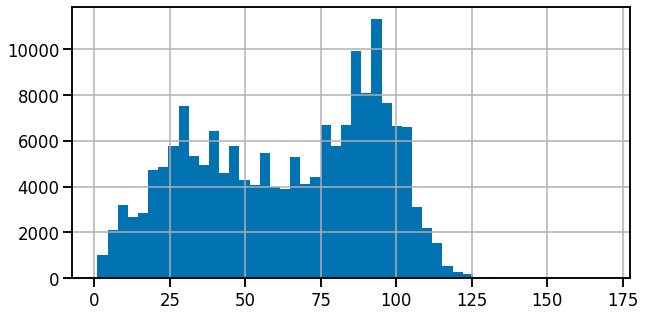

In [15]:
df["length_th"].hist(bins=50, figsize=(10, 5))

In [16]:
df["length_th"].describe()

count    174530.000000
mean     63.583590    
std      30.044277    
min      1.000000     
25%      37.000000    
50%      67.000000    
75%      90.000000    
max      169.000000   
Name: length_th, dtype: float64

In [17]:
df[df["length_th"] >= 125]

,en_segment,th_segment,review_star,correct,length_th,length_en
213,"I bought this for my husband and he loved the print on it but that said it was way too small! The description states Adult Small, while it runs small. My hubby is 6'6"", 220 lb with broad shoulders so we ordered a large. It barely fits him and does not have room to spare, he's about 6'4"". A small wouldn't even get past his shoulders! Good size jacket otherwise, it's nice fabric too. It's heavy like all windbreakers, feels nice against your skin.","ฉันซื้อสิ่งนี้ให้กับสามีของฉันและเขาชอบพิมพ์บน แต่มันบอกว่ามันเล็กเกินไป! คำอธิบายระบุว่า Adult Small ในขณะที่มันรันขนาดเล็ก สามีของฉันคือ 6&#39;6 &quot;, 220 ปอนด์กับไหล่กว้างดังนั้นเราจึงสั่งขนาดใหญ่ มันแทบจะไม่เหมาะกับเขาและไม่มีที่ว่างเหลือเขาประมาณ 6&#39;4 &quot; เล็ก ๆ น้อย ๆ จะไม่ผ่านไหล่ของเขา! แจ็คเก็ตขนาดพอเหมาะไม่งั้นมันก็เป็นผ้าที่ดีเช่นกัน มันหนักเหมือนเสื้อกันลมทั้งหมดรู้สึกดีกับผิวของคุณ",2,0,128,191
3661,I used this adapter with my Nikon D80 and a Canon T3i. It was very easy to connect - no connection problems. Image quality has been great! My camera set up is as follows:1. Use the tripod mount on top.2. Plug into iPod4. Turn it on5. Choose between JPEG or TIFF (optional)6. Switch to photo/video mode7. Run through menus8. Select photos from memory card9. Copy them into USB drive Rating: 5.,ฉันใช้อะแดปเตอร์นี้กับกล้อง Nikon D80 และ Canon T3i มันง่ายในการเชื่อมต่อ - ไม่มีปัญหาการเชื่อมต่อ คุณภาพของภาพยอดเยี่ยมมาก! การตั้งค่ากล้องของฉันมีดังนี้: 1. ใช้ขาตั้งกล้องด้านบน 2. เสียบเข้ากับ iPod4 เปิดใช้ที่ 5 เลือกระหว่าง JPEG หรือ TIFF (ตัวเลือก) 6 เปลี่ยนเป็นโหมดภาพถ่าย / วิดีโอ 7 ทำงานผ่านเมนู 8 เลือกภาพถ่ายจากการ์ดหน่วยความจำ 9 คัดลอกไปยังไดรฟ์ USB คะแนน: 5,5,1,125,162
3736,"If you like the movie 'Home Alone 2', this is an excellent addition to your collection (well made, nice picture, not the best sound though). I bought 3 sets and all were good. The set with Macaulay Culkin was my least favorite - just got it out of curiousity. Not a very good story. But as they said, that doesn't mean it's bad. It's still worth adding because you're basically getting three movies for less than one. My next purchase will be one starring Adam Sandler too.","หากคุณชอบภาพยนตร์ &#39;Home Alone 2&#39; นี่เป็นส่วนเสริมที่ยอดเยี่ยมสำหรับคอลเลกชันของคุณ (ทำมาอย่างดี, รูปภาพสวย, ไม่ใช่เสียงที่ดีที่สุด) ฉันซื้อ 3 ชุดและทั้งหมดนั้นดี ชุดที่มี Macaulay Culkin เป็นที่ชื่นชอบน้อยที่สุดของฉัน - เพียงแค่ได้รับมันออกมาจากความอยากรู้อยากเห็น ไม่ใช่เรื่องที่ดีมาก แต่อย่างที่พวกเขาพูดนั่นไม่ได้หมายความว่ามันแย่ มันยังคงมีมูลค่าเพิ่มเพราะโดยทั่วไปคุณจะได้รับภาพยนตร์สามเรื่องน้อยกว่าหนึ่งเรื่อง การซื้อครั้งต่อไปของฉันจะเป็นอีกหนึ่งการแสดงโดย Adam Sandler เช่นกัน",4,1,132,194
4732,"This novel should have been titled, ""What to do after you're divorced. ""It seems all the couples that end up in these novels are unmarried. The first time I saw Mr. Darcy at Pemberley, he told Elizabeth of his ""divorce from the woman who broke my heart."" When she replied, ""But you won't be alone any more."" He answered, ""I believe so too."" As far as Jane Austen could see, no man had a right to continue living, marrying, and having affairs with anyone until they were married.",นวนิยายเรื่องนี้ควรมีชื่อว่า &quot;จะทำอย่างไรหลังจากคุณหย่าขาดจากกัน ดูเหมือนว่าคู่รักทั้งหมดที่อยู่ในนิยายเหล่านี้จะไม่ได้แต่งงาน ครั้งแรกที่ฉันเห็นคุณดาร์ซีที่เพมเบอร์เลย์เขาบอกเอลิซาเบ ธ ว่า“ การหย่าร้างจากผู้หญิงที่ทำให้หัวใจฉันแตก” เมื่อเธอตอบว่า &quot;แต่คุณจะไม่อยู่คนเดียวอีกต่อไปแล้ว&quot; เขาตอบว่า &quot;ฉันก็เชื่อเช่นกัน&quot; เท่าที่เจนออสเตนมองเห็นไม่มีใครมีสิทธิ์ที่จะดำเนินชีวิตต่อไปแต่งงานและมีความสัมพันธ์กับใครจนกว่าพวกเขาจะแต่งงาน,1,0,127,198
6030,"After charging all night as recommended for the charger, plugged in my camera (Nikon D80) to see how it worked. It said ""device is charging"". Plugged that in, also had a red light indicating power was on, nothing else. Did I hear something incorrect? The manual indicated ""power on"" and ""Power off"" if either port connect

<AxesSubplot:>

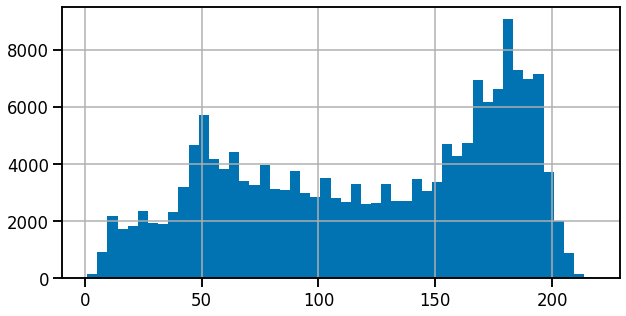

In [18]:
df["length_en"].hist(bins=50, figsize=(10, 5))

In [19]:
df["length_en"].describe()

count    174530.000000
mean     121.389818   
std      56.940324    
min      1.000000     
25%      69.000000    
50%      130.000000   
75%      175.000000   
max      218.000000   
Name: length_en, dtype: float64

In [20]:
df[df["length_en"] >= 200]

,en_segment,th_segment,review_star,correct,length_th,length_en
140,"I wanted a cute little clock with the light up face, but this one doesn't really look like a clock. The description says it lights up, so I was expecting to see bright colored buttons. But, that's not how it's actually shown in the picture. When lit up, its just plain black. You would have thought that a child's bedroom wouldn't need much color coordinating on a clock, but they seem to. For us, as an adult, it doesn't add any style or fun for us or our child.",ฉันต้องการนาฬิกาเล็ก ๆ น่ารักที่มีหน้าสว่างขึ้น แต่นาฬิกานี้ดูไม่เหมือนนาฬิกาจริงๆ คำอธิบายบอกว่ามันสว่างขึ้นดังนั้นฉันคาดหวังว่าจะเห็นปุ่มสีสดใส แต่นั่นไม่ใช่วิธีที่แสดงในภาพ เมื่อสว่างขึ้นมันจะเป็นสีดำล้วน คุณอาจคิดว่าห้องนอนของเด็ก ๆ นั้นไม่ต้องการการประสานงานกับนาฬิกามากนัก แต่ดูเหมือนว่า สำหรับเราในฐานะผู้ใหญ่มันไม่ได้เพิ่มสไตล์หรือความสนุกให้กับเราหรือลูกของเรา,2,0,98,202
141,"Best price and best product! I always keep a box of these on hand in my purse to help with sore or aching muscles. Great for pain when driving, walking through airports. Highly recommend, but you do need some water if you're using it.. You also have to be smart though, as there is an ingredient listed that can poison you. If it's not listed, don't use it! They should warn people about that, but, then again, I've never seen any medical information mentioning it so I'm assuming they don't...",ราคาที่ดีที่สุดและผลิตภัณฑ์ที่ดีที่สุด! ฉันเก็บกล่องใส่ของเหล่านี้ไว้ในกระเป๋าเสมอเพื่อช่วยในการเจ็บหรือปวดกล้ามเนื้อ เหมาะสำหรับความเจ็บปวดขณะขับรถเดินผ่านสนามบิน แนะนำเป็นอย่างยิ่ง แต่คุณต้องใช้น้ำบ้างถ้าคุณใช้มัน .. คุณต้องฉลาดด้วยเพราะมีส่วนประกอบที่สามารถทำให้คุณเป็นพิษได้ หากไม่ได้อยู่ในรายการอย่าใช้! พวกเขาควรเตือนผู้คนเกี่ยวกับสิ่งนั้น แต่จากนั้นอีกครั้งฉันไม่เคยเห็นข้อมูลทางการแพทย์ใด ๆ ที่กล่าวถึงมันดังนั้นฉันจึงสันนิษฐานว่าพวกเขาไม่ ...,5,1,111,205
143,"I was very disappointed to see that when you open the package and put your kindle in there is a strong odor. Very chemically. I'm not sure if it's meant to be so, but it has an odd smell. If that's what you are going for, this case will do just fine. Just know what's inside before ordering. Also, I have a similar case, by another vendor (rooCASE), for my original Kindle Fire. You can't even tell. Not quite as fancy or fancy, but, overall, no chemical smell.",ฉันผิดหวังมากที่เห็นว่าเมื่อคุณเปิดแพคเกจและใส่จุดของคุณในนั้นมีกลิ่นแรง ทางเคมีมาก ฉันไม่แน่ใจว่ามันควรจะเป็นเช่นนั้นหรือไม่ แต่มีกลิ่นแปลก ๆ ถ้านั่นคือสิ่งที่คุณจะทำคดีนี้จะทำได้ดี เพิ่งรู้ว่ามีอะไรอยู่ข้างในก่อนสั่งซื้อ นอกจากนี้ฉันมีกรณีที่คล้ายกันโดยผู้จำหน่ายรายอื่น (rooCASE) สำหรับ Kindle Fire ดั้งเดิมของฉัน คุณไม่สามารถบอกได้ ไม่ค่อนข้างแฟนซีหรือแฟนซี แต่โดยรวมแล้วไม่มีกลิ่นเคมี,1,0,108,202
282,"I was never a huge fan of this series, but I did watch enough episodes to decide it wasn't something for someone like me who needs action and drama all the time. It's almost as violent as The Sopranos, so if what you're looking for...well, pass on this one. If you want an interesting storyline, it's alright, though it isn't my cup of tea. And yes, I'm aware that's supposed to be some kind of compliment, since most series that are labeled ""drama,"" usually end in gunfight.",ฉันไม่เคยเป็นแฟนตัวยงของซีรีส์นี้ แต่ฉันได้ดูตอนมากพอที่จะตัดสินใจว่าไม่ใช่สิ่งที่ใครบางคนเช่นฉันที่ต้องการแอ็คชั่นและละครตลอดเวลา มันเกือบจะรุนแรงเท่ากับ The Sopranos ดังนั้นหากสิ่งที่คุณกำลังมองหา ... เอาล่ะส่งผ่านสิ่งนี้ หากคุณต้องการเรื่องราวที่น่าสนใจก็ไม่เป็นไรถึงแม้ว่ามันจะไม่ใช่ถ้วยชาของฉันก็ตาม และใช่ฉันรู้ว่ามันควรจะเป็นคำชมเชยเนื่องจากซีรีย์ส่วนใหญ่ที่มีป้ายกำกับว่า &quot;ดราม่า&quot; มักจะจบลงด้วยการดวลปืน,1,0,111,202
288,"This printer was not that great in the first year and now it's had problems. A total waste for me. The ink doesn't last as long anymore since they use less ink. I just replaced my color cartridge this morning. One of them wouldn't work at all so I've already gone through two black cartridges. And it says to replace with origin

### Word length distribution

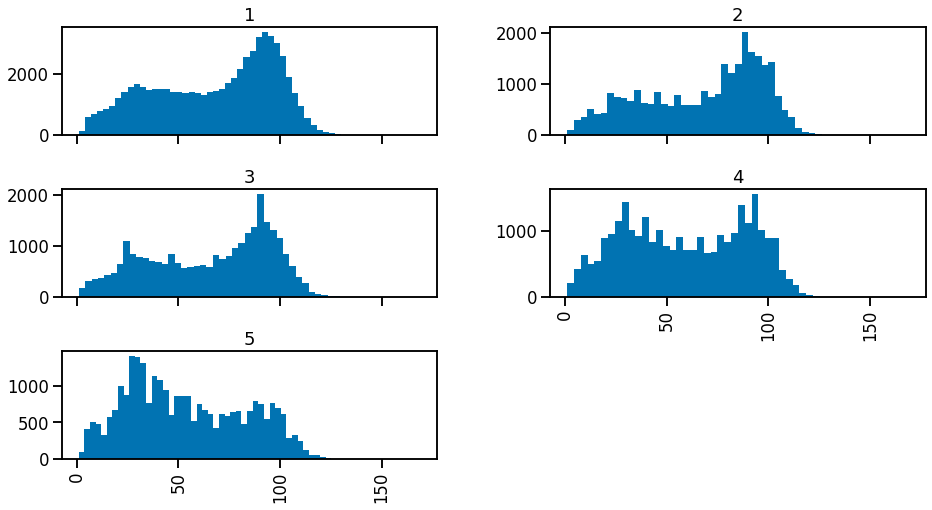

In [31]:
df.hist(column="length_th", by="review_star", bins=50, figsize=(15,8), sharex=True)
plt.show()

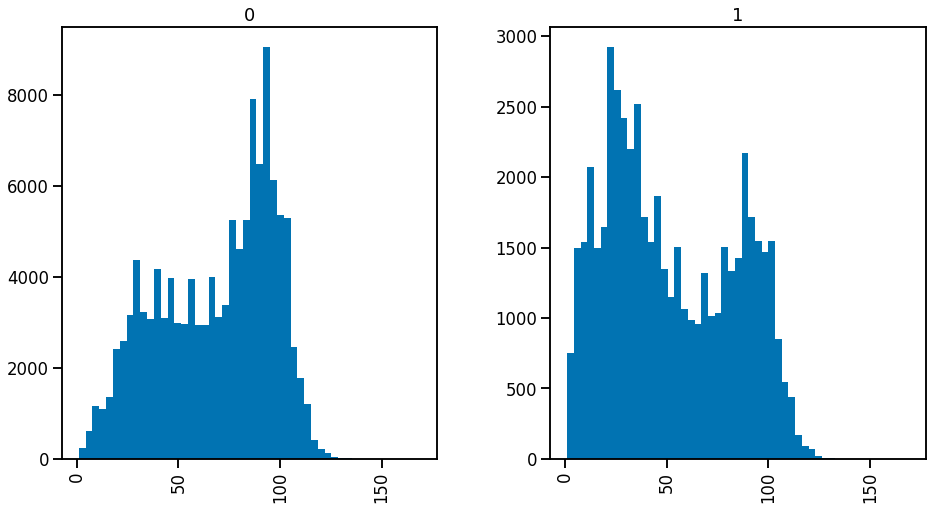

In [30]:
df.hist(column="length_th", by="correct", bins=50, figsize=(15,8), sharex=True)
plt.show()

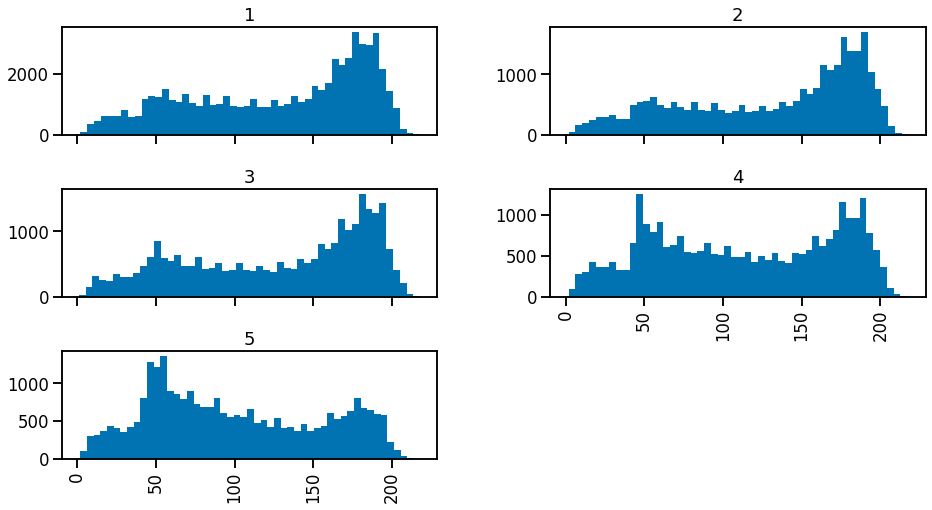

In [29]:
df.hist(column="length_en", by="review_star", bins=50, figsize=(15,8), sharex=True)
plt.show()

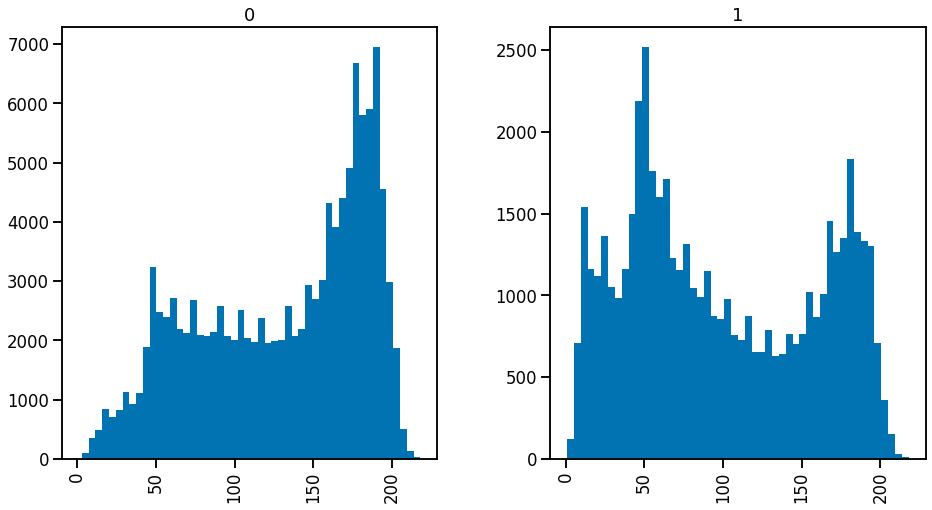

In [28]:
df.hist(column="length_en", by="correct", bins=50, figsize=(15,8), sharex=True)
plt.show()

# Preprocess

In [32]:
def top_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''

    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ["feature", "score"]

    return df

In [33]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''

    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)

    return top_feats(tfidf_means, features, top_n)

In [34]:
def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''

    dfs = []
    labels = np.unique(y)

    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)

    return dfs

In [35]:
def plot_classfeats_h(dfs, score_name=''):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''

    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))

    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel(f"Mean {score_name} Score", labelpad=16, fontsize=14)
        ax.set_title("label = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        ax.invert_yaxis()
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)

    plt.show()

In [36]:
def show_classfeats(df, vectorizer, analyzer, score_name='', text_col='texts', class_col='category', is_emoji=False):
    vec = vectorizer(analyzer=analyzer)
    mat = vec.fit_transform(df[text_col])
    dfs = top_feats_by_class(mat, df[class_col], vec.get_feature_names())

    if is_emoji:
        for dataframe in dfs:
            dataframe.columns = [dataframe.label, 'tfidf_' + dataframe.label]
        return pd.concat(dfs, axis=1)
    else:
        plot_classfeats_h(dfs, score_name=score_name)

In [37]:
import string
import emoji
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [word for word in word_tokenize(nopunc) if word and not re.search(pattern=r"\s+", string=word)]

def extract_url(text):
    URL_PATTERN = r"(https?:\/\/)?\.([\da-z-]+)\.([a-z\.]{2,6})([\/\w\.-]*)*\/?\S"
    return [url[1] for url in re.findall(pattern=URL_PATTERN, string=text.lower())]

def extract_emojis(str):
    return [c for c in str if c in emoji.UNICODE_EMOJI]

def extract_punc(text):
    return [char for char in text if char in string.punctuation]

def extract_hashtags(text):
    HASHTAG_PATTERN = r"#[a-zA-Z0-9ก-๙]+"
    return re.findall(pattern=HASHTAG_PATTERN, string=text)

## TF-IDF

### Words

/Users/admin/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/admin/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


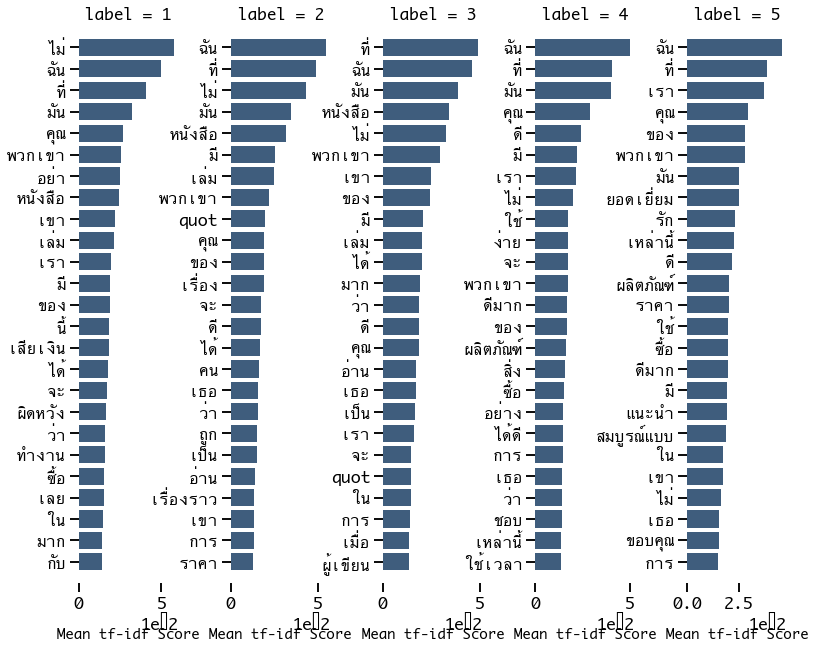

In [43]:
show_classfeats(
    df=df[:1000],
    text_col='th_segment',
    class_col='review_star',
    vectorizer=TfidfVectorizer,
    analyzer=process_text,
    score_name="tf-idf",
)

/Users/admin/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/admin/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


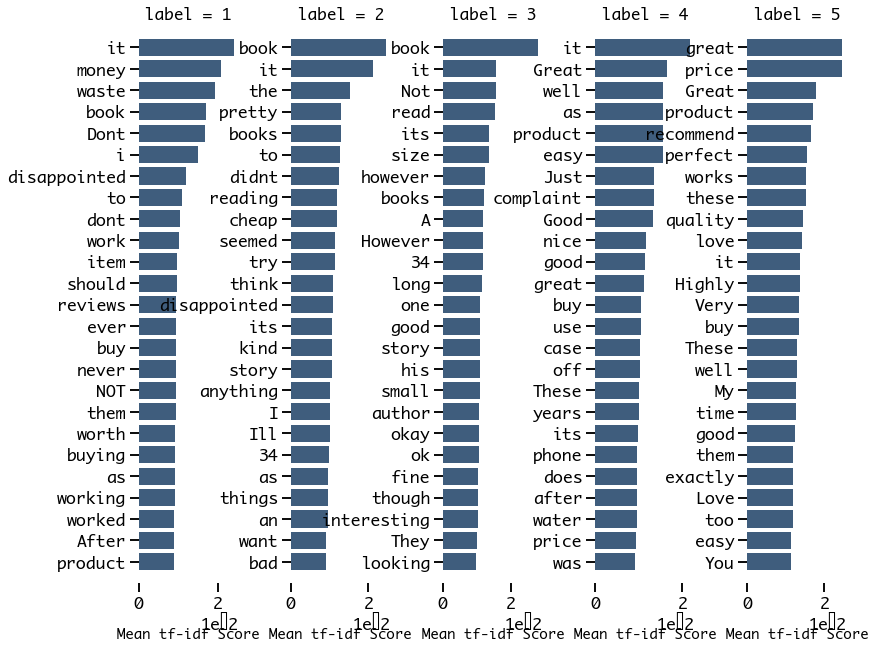

In [45]:
show_classfeats(
    df=df[:1000],
    text_col='en_segment',
    class_col='review_star',
    vectorizer=TfidfVectorizer,
    analyzer=process_text,
    score_name="tf-idf",
)

/Users/admin/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/admin/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


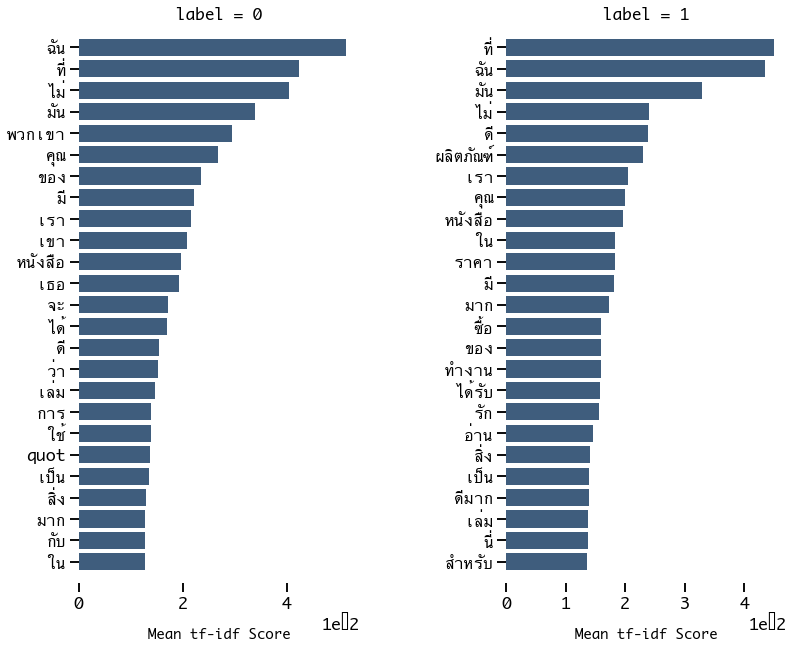

In [46]:
show_classfeats(
    df=df[:1000],
    text_col='th_segment',
    class_col='correct',
    vectorizer=TfidfVectorizer,
    analyzer=process_text,
    score_name="tf-idf",
)

/Users/admin/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/admin/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


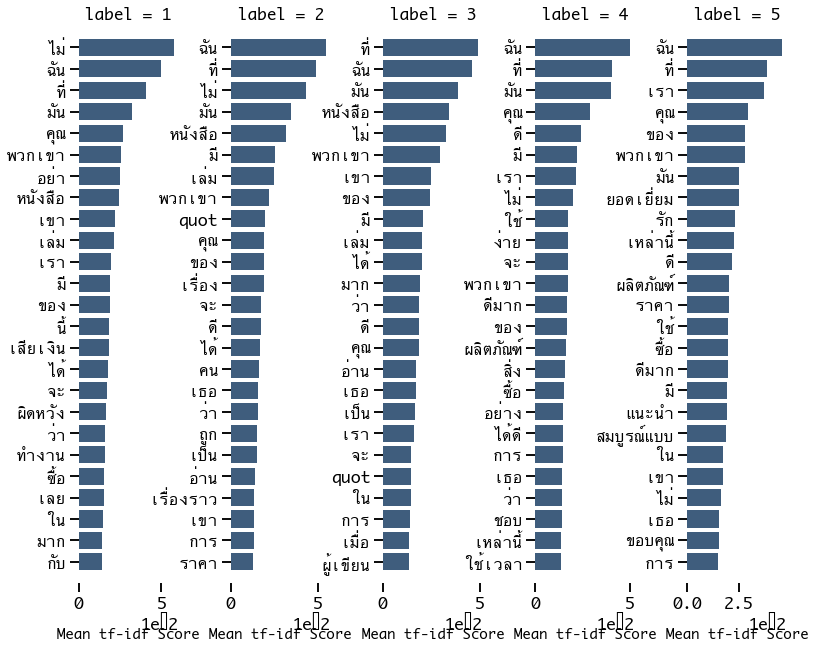

In [47]:
show_classfeats(
    df=df[:1000],
    text_col='th_segment',
    class_col='review_star',
    vectorizer=TfidfVectorizer,
    analyzer=process_text,
    score_name="tf-idf",
)

### Punctuations

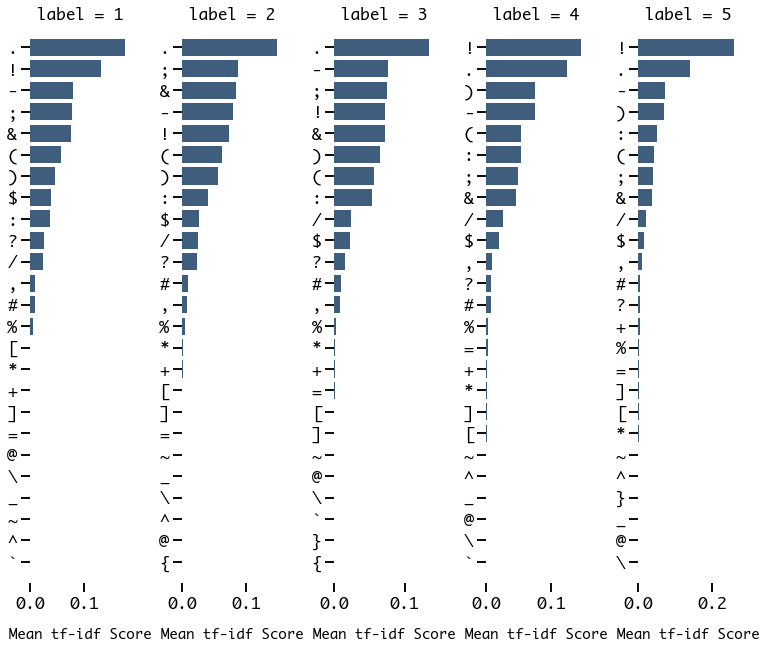

In [50]:
show_classfeats(df=df, 
                text_col='th_segment',
                class_col='review_star',
                vectorizer=TfidfVectorizer, 
                score_name="tf-idf", 
                analyzer=extract_punc)

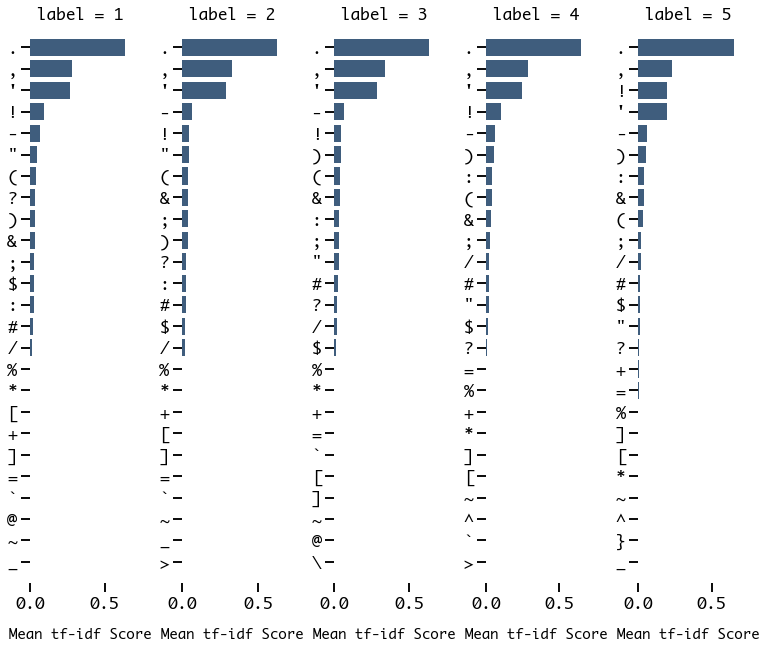

In [51]:
show_classfeats(df=df, 
                text_col='en_segment',
                class_col='review_star',
                vectorizer=TfidfVectorizer, 
                score_name="tf-idf", 
                analyzer=extract_punc)

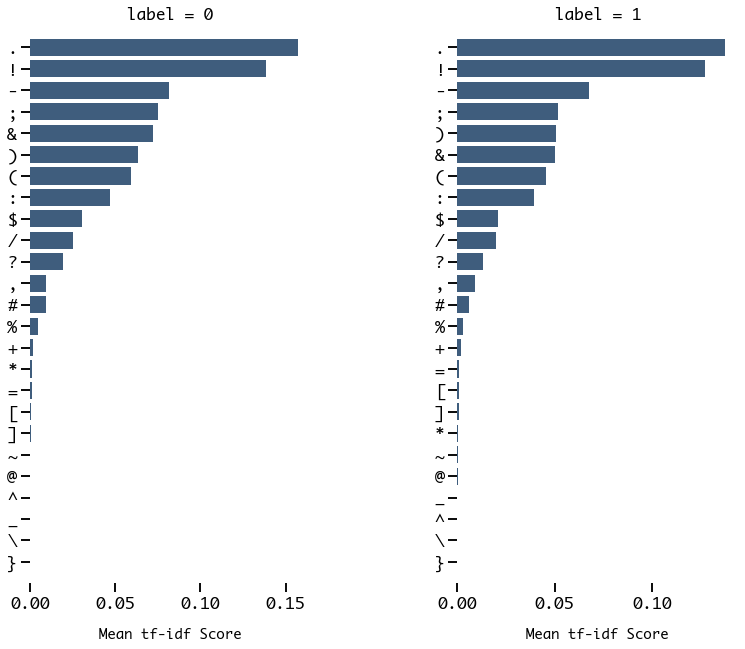

In [52]:
show_classfeats(df=df, 
                text_col='th_segment',
                class_col='correct',
                vectorizer=TfidfVectorizer, 
                score_name="tf-idf", 
                analyzer=extract_punc)

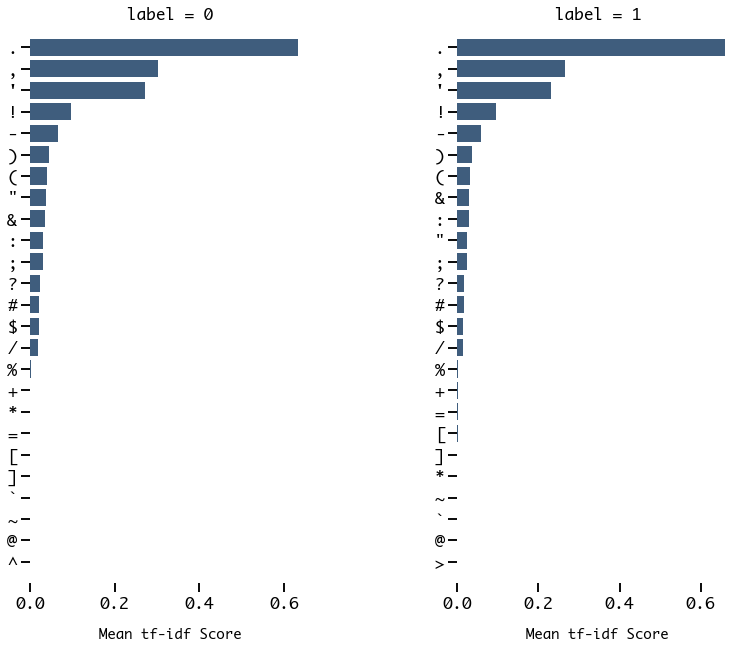

In [54]:
show_classfeats(df=df, 
                text_col='en_segment',
                class_col='correct',
                vectorizer=TfidfVectorizer, 
                score_name="tf-idf", 
                analyzer=extract_punc)